In [1]:
import os
import requests
from dotenv import load_dotenv
import pandas as pd
import datetime as dt
from MCForecastTools import MCSimulation

In [2]:
load_dotenv()

True

In [3]:
ra_key = os.getenv("RAPIDAPI_KEY")
print(len(ra_key))

50


In [4]:
url = "https://alpha-vantage.p.rapidapi.com/query"

#querystring = {"from_symbol":"EUR","function":"FX_DAILY","to_symbol":"USD","outputsize":"compact","datatype":"csv"}
#querystring = {"function":"FX_INTRADAY","to_symbol":"USD","interval":"60min","from_symbol":"EUR","datatype":"csv","outputsize":"full"}
# change from "outputsize":"compact" to "outputsize":"full"

eur_querystring = {"from_symbol":"EUR","function":"FX_DAILY","to_symbol":"USD","outputsize":"full","datatype":"csv"}
jpy_querystring = {"from_symbol":"USD","function":"FX_DAILY","to_symbol":"JPY","outputsize":"full","datatype":"csv"}
gbp_querystring = {"from_symbol":"GBP","function":"FX_DAILY","to_symbol":"USD","outputsize":"full","datatype":"csv"}
headers = {
    'x-rapidapi-key': ra_key,
    'x-rapidapi-host': "alpha-vantage.p.rapidapi.com"
    }

#response = requests.request("GET", url, headers=headers, params=querystring)

eur_response = requests.request("GET", url, headers=headers, params=eur_querystring)
jpy_response = requests.request("GET", url, headers=headers, params=jpy_querystring)
gbp_response = requests.request("GET", url, headers=headers, params=gbp_querystring)

In [5]:
print('euro')
print(eur_response.text)
print('yen')
print(jpy_response.text)
print('pound')
print(gbp_response.text)

euro
timestamp,open,high,low,close
2021-01-07,1.2339,1.2345,1.2243,1.2267
2021-01-06,1.2296,1.2349,1.2264,1.2324
2021-01-05,1.2247,1.2306,1.2243,1.2296
2021-01-04,1.2239,1.2310,1.2229,1.2246
2021-01-01,1.2215,1.2215,1.2214,1.2214
2020-12-31,1.2295,1.2309,1.2207,1.2214
2020-12-30,1.2248,1.2310,1.2244,1.2296
2020-12-29,1.2214,1.2275,1.2206,1.2248
2020-12-28,1.2183,1.2250,1.2179,1.2216
2020-12-25,1.2184,1.2205,1.2161,1.2183
2020-12-24,1.2185,1.2216,1.2176,1.2184
2020-12-23,1.2160,1.2221,1.2152,1.2185
2020-12-22,1.2243,1.2257,1.2150,1.2161
2020-12-21,1.2220,1.2253,1.2128,1.2243
2020-12-18,1.2268,1.2272,1.2224,1.2255
2020-12-17,1.2197,1.2273,1.2189,1.2266
2020-12-16,1.2150,1.2212,1.2124,1.2198
2020-12-15,1.2142,1.2169,1.2120,1.2150
2020-12-14,1.2134,1.2177,1.2114,1.2143
2020-12-11,1.2136,1.2163,1.2103,1.2112
2020-12-10,1.2079,1.2159,1.2073,1.2135
2020-12-09,1.2100,1.2147,1.2099,1.2133
2020-12-08,1.2107,1.2134,1.2094,1.2101
2020-12-07,1.2130,1.2166,1.2077,1.2108
2020-12-04,1.2145,1.2178,1.21

In [6]:
eur_data = eur_response.text
eur_df = pd.DataFrame([x.split(',') for x in eur_data.splitlines()])
eur_df.columns = eur_df.iloc[0]
eur_df = eur_df[1:]
eur_df.columns = ['datetime', 'open', 'high', 'low', 'close']

jpy_data = jpy_response.text
jpy_df = pd.DataFrame([x.split(',') for x in jpy_data.splitlines()])
jpy_df.columns = jpy_df.iloc[0]
jpy_df = jpy_df[1:]
jpy_df.columns = ['datetime', 'open', 'high', 'low', 'close']

gbp_data = gbp_response.text
gbp_df = pd.DataFrame([x.split(',') for x in gbp_data.splitlines()])
gbp_df.columns = gbp_df.iloc[0]
gbp_df = gbp_df[1:]
gbp_df.columns = ['datetime', 'open', 'high', 'low', 'close']

In [7]:
eur_df.shape

(5000, 5)

In [8]:
eur_df.head()

,datetime,open,high,low,close
1,2021-01-07,1.2339,1.2345,1.2243,1.2267
2,2021-01-06,1.2296,1.2349,1.2264,1.2324
3,2021-01-05,1.2247,1.2306,1.2243,1.2296
4,2021-01-04,1.2239,1.2310,1.2229,1.2246
5,2021-01-01,1.2215,1.2215,1.2214,1.2214


In [9]:
d = {'eur':eur_df, 'jpy':jpy_df, 'gbp':gbp_df}

curr_fx=pd.concat(d.values(),axis=1, keys=d.keys())
curr_fx.head()

eur                                         jpy                      \
     datetime    open    high     low   close    datetime      open      high   
1  2021-01-07  1.2339  1.2345  1.2243  1.2267  2021-01-07  103.0270  103.9570   
2  2021-01-06  1.2296  1.2349  1.2264  1.2324  2021-01-06  102.7060  103.4440   
3  2021-01-05  1.2247  1.2306  1.2243  1.2296  2021-01-05  103.1050  103.1910   
4  2021-01-04  1.2239  1.2310  1.2229  1.2246  2021-01-04  103.0990  103.3160   
5  2021-01-01  1.2215  1.2215  1.2214  1.2214  2021-01-01  103.2480  103.2670   

                              gbp                                  
        low     close    datetime    open    high     low   close  
1  102.9200  103.8630  2021-01-07  1.3626  1.3633  1.3531  1.3549  
2  102.5600  103.0140  2021-01-06  1.3626  1.3672  1.3537  1.3605  
3  102.5700  102.6970  2021-01-05  1.3570  1.3642  1.3552  1.3625  
4  102.6800  103.1030  2021-01-04  1.3656  1.3704  1.3539  1.3566  
5  103.1910  103.1910  2021-01-01  1.3663  1.3674  1.3663  1.3671

In [10]:
curr_fx.shape

(5000, 15)

In [11]:
curr_fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 1 to 5000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   (eur, datetime)  5000 non-null   object
 1   (eur, open)      5000 non-null   object
 2   (eur, high)      5000 non-null   object
 3   (eur, low)       5000 non-null   object
 4   (eur, close)     5000 non-null   object
 5   (jpy, datetime)  5000 non-null   object
 6   (jpy, open)      5000 non-null   object
 7   (jpy, high)      5000 non-null   object
 8   (jpy, low)       5000 non-null   object
 9   (jpy, close)     5000 non-null   object
 10  (gbp, datetime)  5000 non-null   object
 11  (gbp, open)      5000 non-null   object
 12  (gbp, high)      5000 non-null   object
 13  (gbp, low)       5000 non-null   object
 14  (gbp, close)     5000 non-null   object
dtypes: object(15)
memory usage: 586.1+ KB


In [12]:
curr_fx['eur','open'] = curr_fx['eur','open'].astype(float)
curr_fx['eur','high'] = curr_fx['eur','high'].astype(float)
curr_fx['eur','low'] = curr_fx['eur','low'].astype(float)
curr_fx['eur','close'] = curr_fx['eur','close'].astype(float)


curr_fx['jpy','open'] = curr_fx['jpy','open'].astype(float)
curr_fx['jpy','high'] = curr_fx['jpy','high'].astype(float)
curr_fx['jpy','low'] = curr_fx['jpy','low'].astype(float)
curr_fx['jpy','close'] = curr_fx['jpy','close'].astype(float)

curr_fx['gbp','open'] = curr_fx['gbp','open'].astype(float)
curr_fx['gbp','high'] = curr_fx['gbp','high'].astype(float)
curr_fx['gbp','low'] = curr_fx['gbp','low'].astype(float)
curr_fx['gbp','close'] = curr_fx['gbp','close'].astype(float)

curr_fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 1 to 5000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (eur, datetime)  5000 non-null   object 
 1   (eur, open)      5000 non-null   float64
 2   (eur, high)      5000 non-null   float64
 3   (eur, low)       5000 non-null   float64
 4   (eur, close)     5000 non-null   float64
 5   (jpy, datetime)  5000 non-null   object 
 6   (jpy, open)      5000 non-null   float64
 7   (jpy, high)      5000 non-null   float64
 8   (jpy, low)       5000 non-null   float64
 9   (jpy, close)     5000 non-null   float64
 10  (gbp, datetime)  5000 non-null   object 
 11  (gbp, open)      5000 non-null   float64
 12  (gbp, high)      5000 non-null   float64
 13  (gbp, low)       5000 non-null   float64
 14  (gbp, close)     5000 non-null   float64
dtypes: float64(12), object(3)
memory usage: 586.1+ KB


In [20]:
# curr_fx.xs('close',level=1,axis=1).pct_change()

MC_even_dist = MCSimulation(
    portfolio_data = curr_fx,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 40*31
)


In [1]:
MC_even_dist.portfolio_data.head(25)

NameError: name 'MC_even_dist' is not defined

In [22]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002720,0.999224,1.000619,0.999614,0.999824,1.001669,1.003231,0.999277,1.005540,0.999617,...,1.003329,1.004949,1.002399,1.000822,1.000650,1.005112,0.996805,1.001495,0.997261,1.002570
2,1.011369,1.000178,1.004820,0.995112,1.001145,0.999345,0.992835,0.998635,1.002736,1.000081,...,1.005980,1.009631,1.005704,1.004825,0.998210,1.009037,0.998357,1.004548,0.995714,1.004683
3,1.012566,1.001372,1.001398,0.992102,0.999031,0.999120,0.990281,0.997490,0.995099,0.999317,...,1.007169,1.009359,1.006740,1.003733,1.001805,1.017274,0.994877,1.003569,0.991603,1.007757
4,1.011258,0.999561,1.000683,0.996128,0.998208,1.001658,0.993138,1.002164,1.000006,0.995954,...,1.008028,1.009574,1.006863,1.008257,0.999371,1.016216,0.991634,1.002519,0.991815,1.014018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,0.812312,0.983698,0.894441,1.168780,0.992115,1.183214,0.798423,1.099052,1.003672,0.939201,...,1.182487,1.028080,0.915260,0.942305,1.183571,1.096673,1.177804,0.920273,0.925431,1.009958
1237,0.811358,0.978546,0.890565,1.176991,0.985965,1.183730,0.794854,1.105597,1.007477,0.938034,...,1.178804,1.020239,0.917393,0.939845,1.186988,1.099981,1.177184,0.919608,0.926637,1.004607
1238,0.808232,0.976312,0.891293,1.176635,0.984000,1.179827,0.794214,1.109919,1.003923,0.938543,...,1.175515,1.016757,0.913101,0.945245,1.183104,1.092966,1.178097,0.916463,0.933193,1.008827
1239,0.817291,0.969421,0.887864,1.174826,0.985625,1.180490,0.793864,1.116476,1.005189,0.939156,...,1.174618,1.020598,0.909279,0.943571,1.180040,1.094416,1.174600,0.913780,0.934086,1.015048


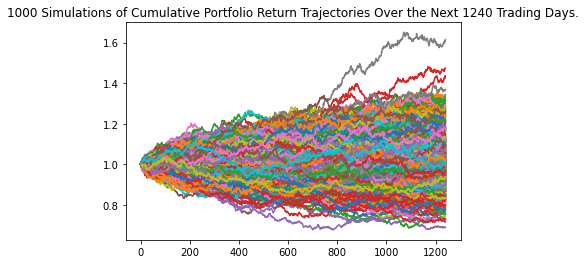

In [23]:
line_plot = MC_even_dist.plot_simulation()

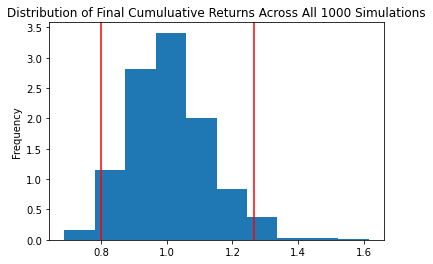

In [24]:
dist_plot = MC_even_dist.plot_distribution()

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.008270
std                0.119509
min                0.688198
25%                0.927277
50%                0.999486
75%                1.080056
max                1.614625
95% CI Lower       0.800749
95% CI Upper       1.264579
Name: 1240, dtype: float64


In [28]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments
even_tbl_ci_lower = round(even_tbl[8]*10000,2)
even_tbl_ci_upper = round(even_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_tbl_ci_lower} and ${even_tbl_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $8007.49 and $12645.79.
